# Loan Application Status Prediction

People apply for laon and the banks have to validate that whether person should be given loan or not. We have to build a system which will take certain data point as input and provide output as loan should be given or not. we have the dataset and this dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.


# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

# Independent Variables (Feature Variables):

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

# Dependent Variable (Target Variable):

Loan_Status

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df= pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA

# Check For Null Values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

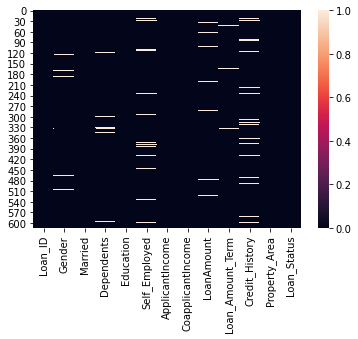

In [8]:
sns.heatmap(df.isnull())

The null values are filled with mean for numerical columns, mode for categorical columns

In [9]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

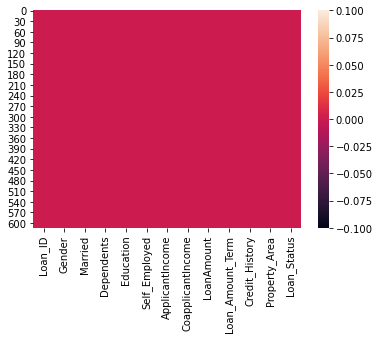

In [11]:
sns.heatmap(df.isnull())

The dataset has no missing values now. We shall proceed with further analysis.

In [12]:
df.drop('Loan_ID', axis=1, inplace=True)

Dropping Loan_ID column since it is merely an identification number. It doesnt contribute much to the target

In [19]:
#Check for number of unique values in each columns
df.nunique().to_frame("Unique Values")

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


In [30]:
# To find the Categorical Columns
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [31]:
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64' or  df.dtypes[x]=='float64']
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

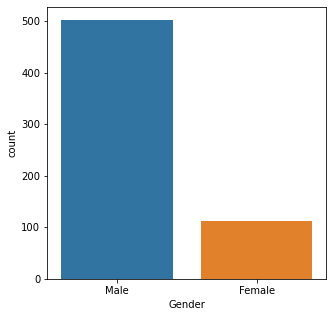

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(df['Gender'])
plt.show()

In the above plot we can see that the number of males cover more than 80% of the rows in Gender column while females cover only 20% of rows.

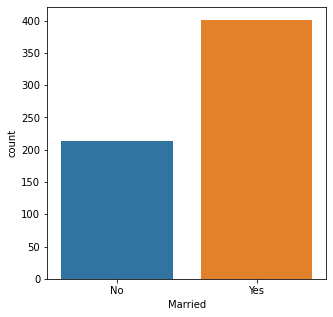

In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df['Married'])
plt.show()

Married people are more than unmarried who applies for a loan.

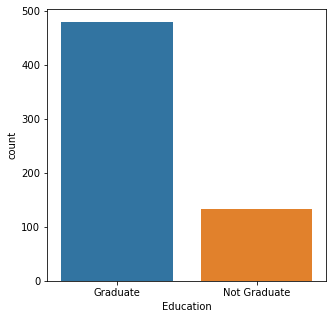

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(df['Education'])
plt.show()

Most Graduates seems to apply for loan compared to non graduates.

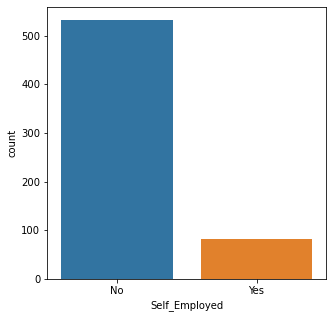

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(df['Self_Employed'])
plt.show()

This plot shows self employed people dont prefer to apply for a loan too frequently. Professionals seems to apply more

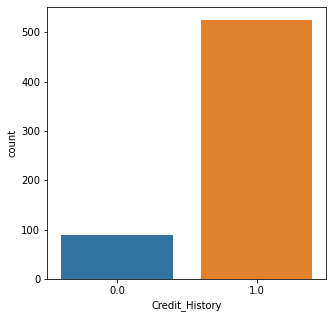

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(df['Credit_History'])
plt.show()

More than 80% of the people has their credit history available.

# Target Variable- Loan Status

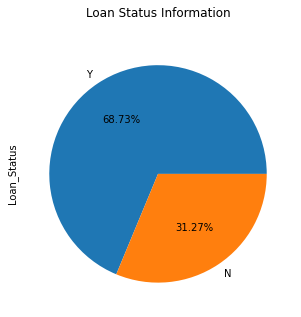

In [20]:
plt.figure(figsize=(5,5))
df['Loan_Status'].value_counts().plot.pie(autopct="%2.2f%%")
plt.title('Loan Status Information\n')
plt.show()

 we can see that the target has 68.73% of loan approved status while 31.27% of loan rejected status. This shows an imbalance that needs to be treated before building our machine learning models.

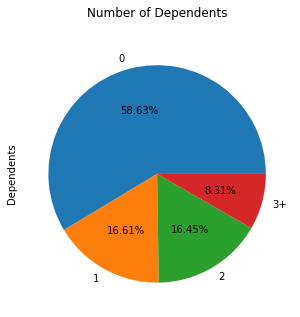

In [21]:
#Dependents
plt.figure(figsize=(5,5))
df['Dependents'].value_counts().plot.pie(autopct="%2.2f%%")
plt.title('Number of Dependents\n')
plt.show()

From the plot, we see 56.63% rows are covered with people having 0 dependents, 16.61% rows covered with people having 1 dependent, 16.45% rows covered with people having 2 dependents and 8.31% rows covered with people having 3 or more dependents.

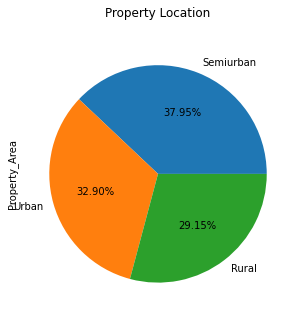

In [22]:
#Property_Area
plt.figure(figsize=(5,5))
df['Property_Area'].value_counts().plot.pie(autopct="%2.2f%%")
plt.title('Property Location\n')
plt.show()

From the above plot, We see that 37.95% area are covered by Semi urban type, 32.90% area are covered by urban type, 29.15% area are covered by rural type.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

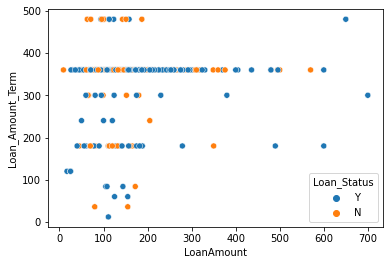

In [24]:
sns.scatterplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

we can see that most of the data points are accumulated from 200 to 480 terms while loan amount ranging from 50-250. Amount more than 250 for a period of 480 mostly seems to be getting rejected than approved.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

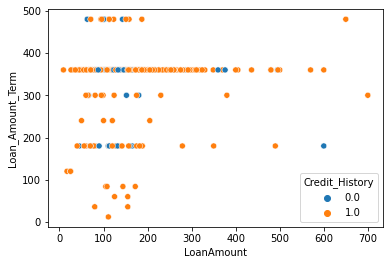

In [25]:
sns.scatterplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')

For the most cases the credit history is positive to get the loan approved

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

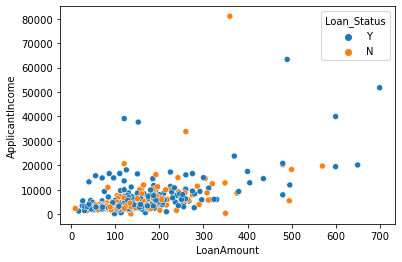

In [26]:
sns.scatterplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')

For the loan amount between 50 to 350, the applicant income is between 15000 to 20000.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

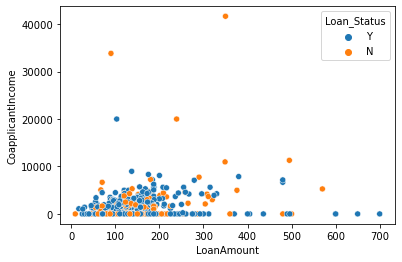

In [27]:
sns.scatterplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')

In the above plot we see the co applicants with higher income are mostly denied loan where most data values are between 0-10000.

# Encoding the categorical columns

In [28]:
LE = LabelEncoder()

In [32]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

In [33]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


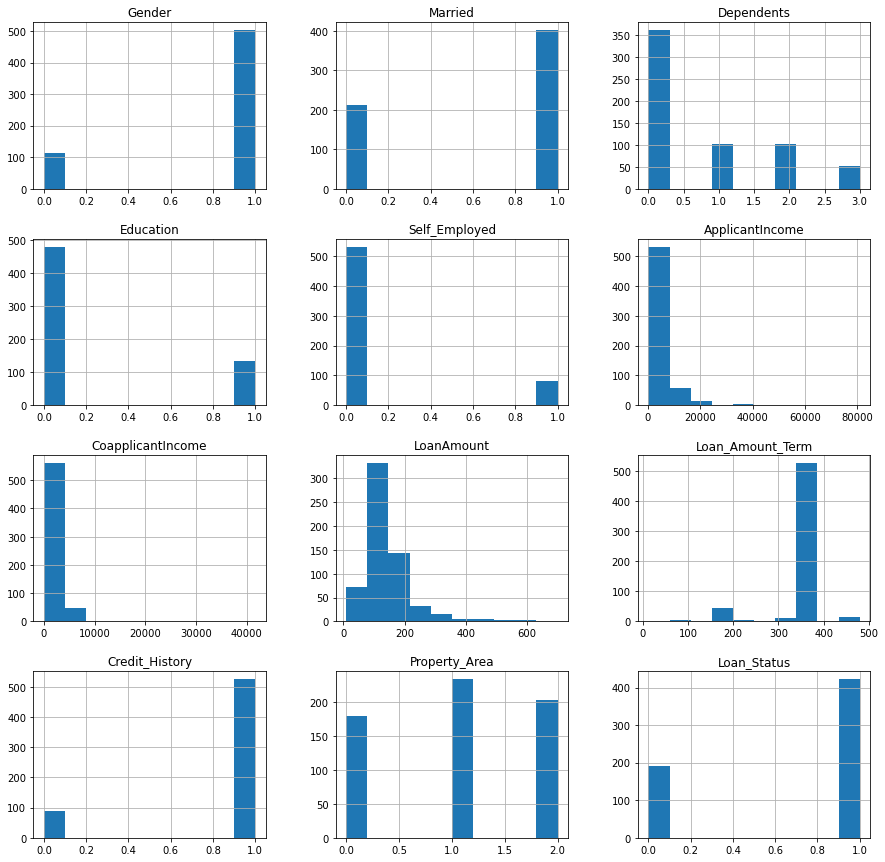

In [36]:
df.hist(figsize=(15,15))
plt.show()

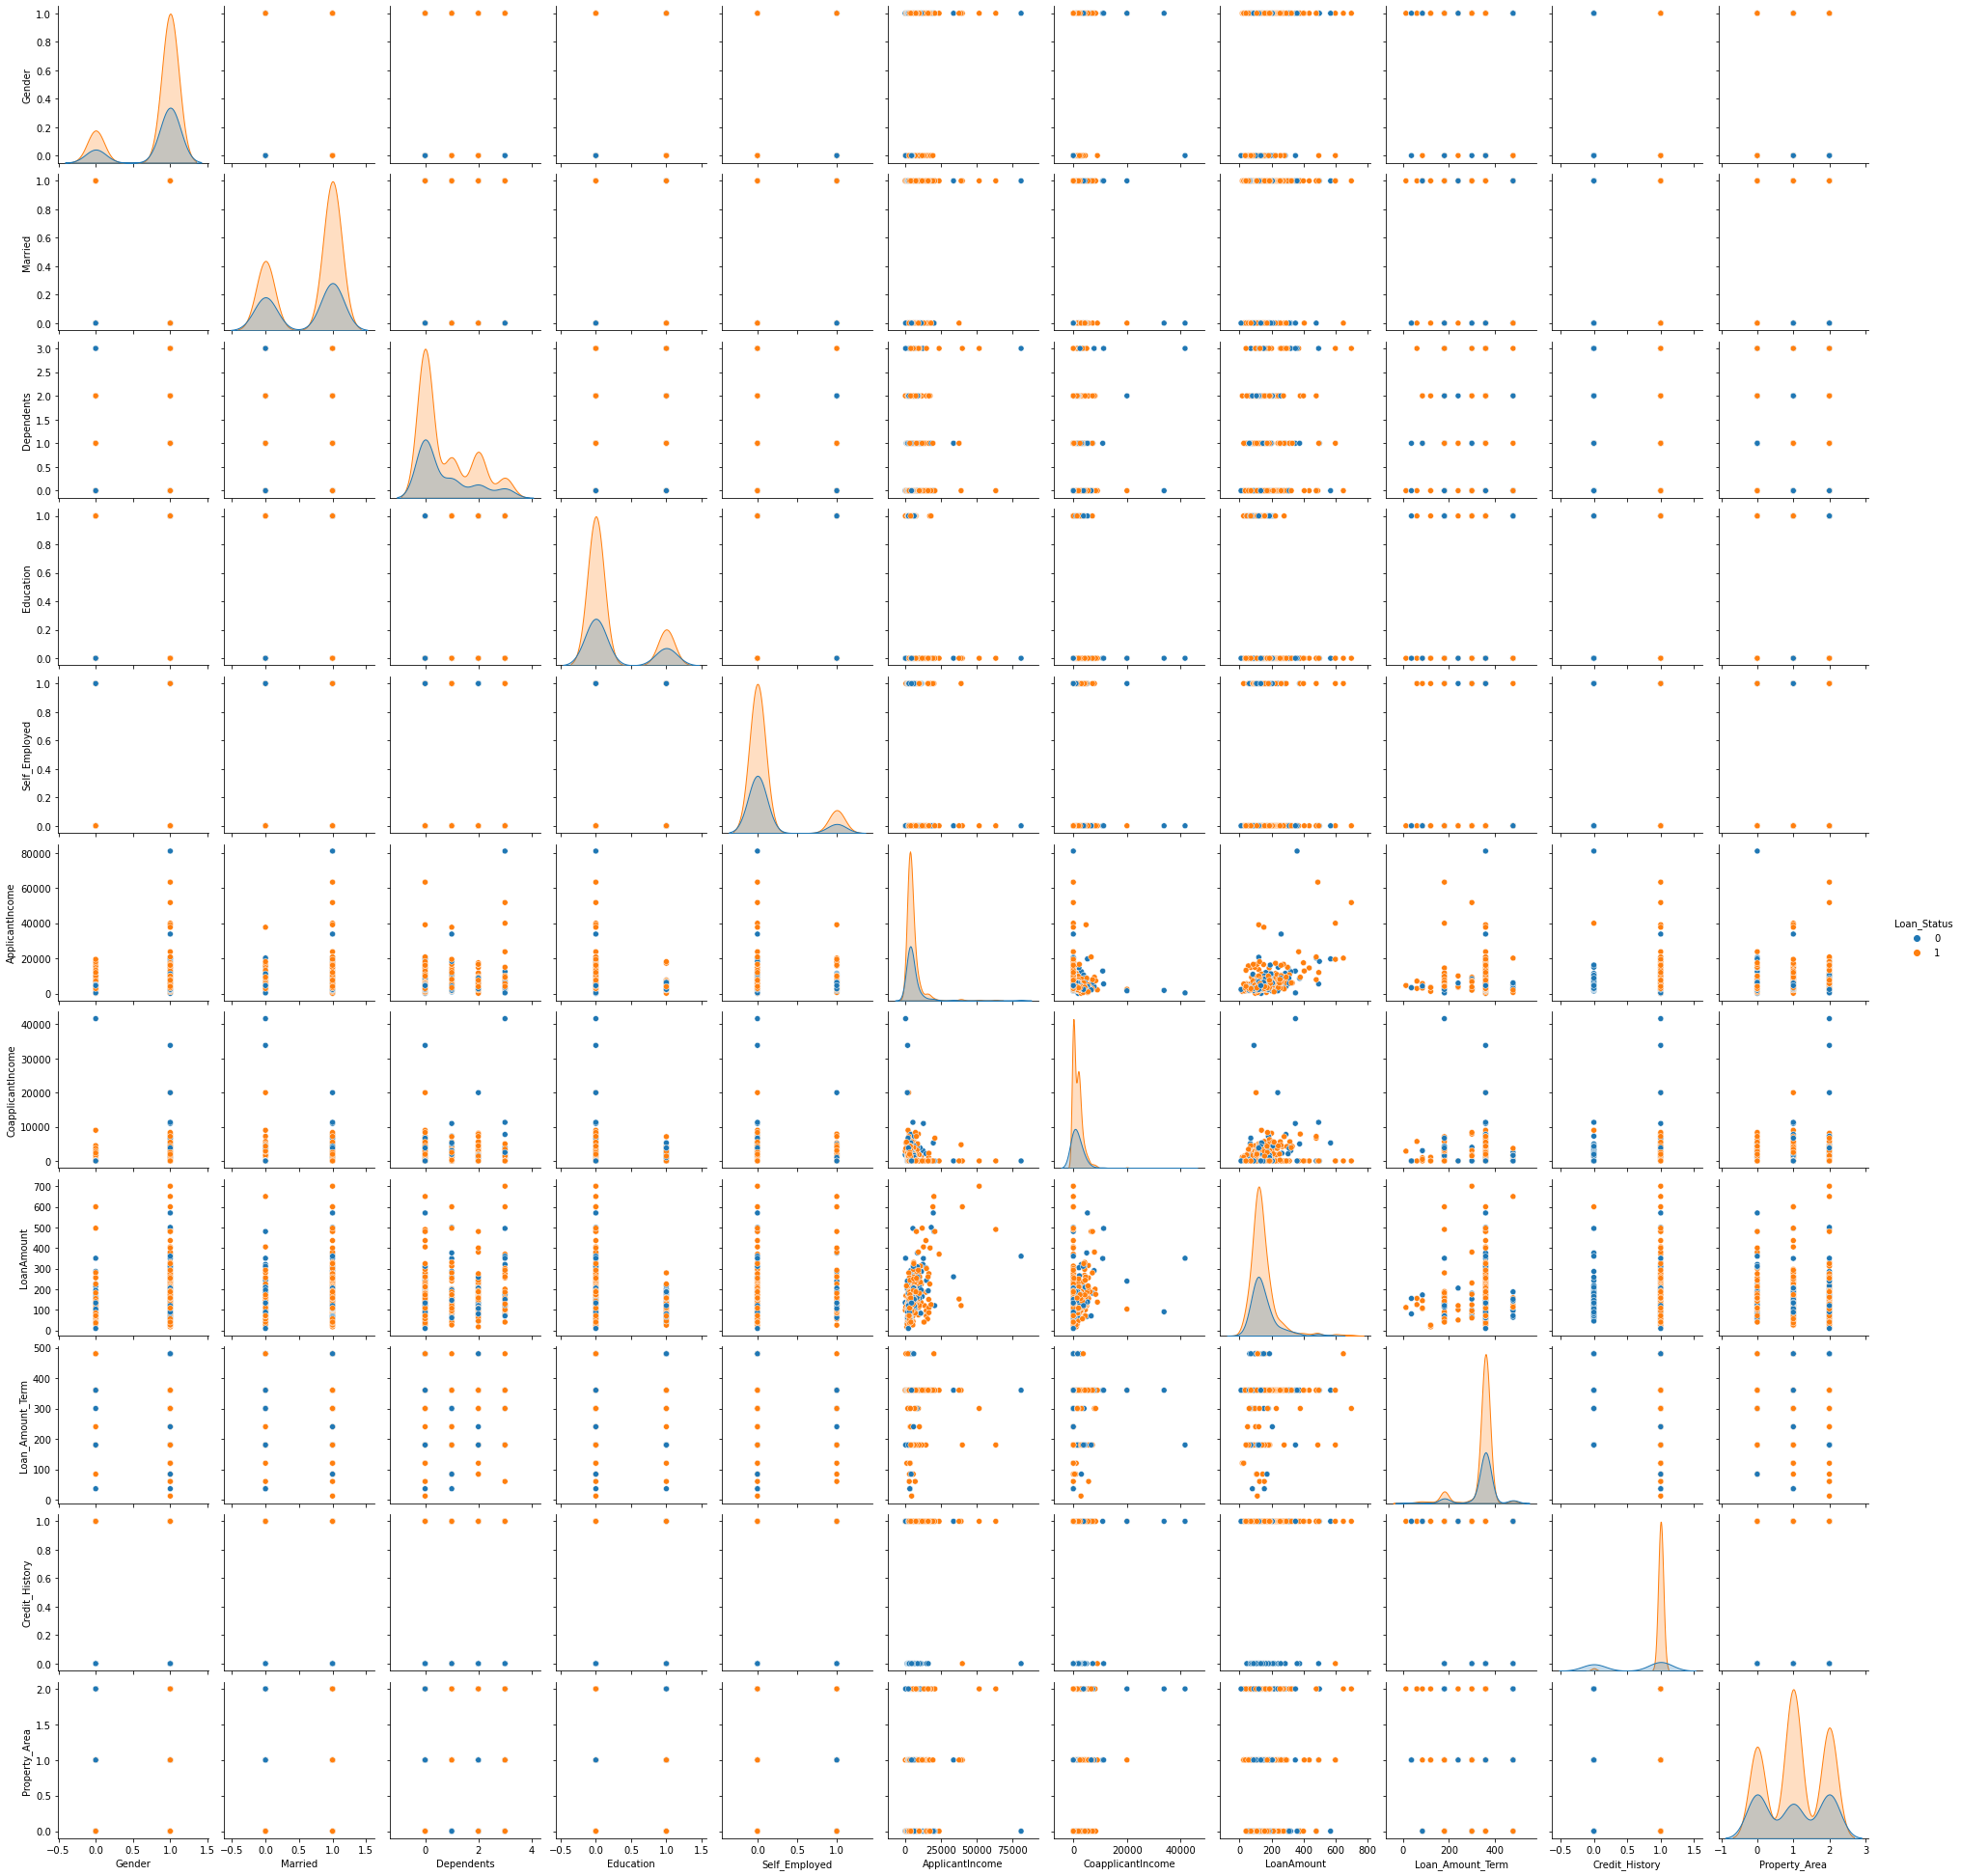

In [37]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')

This shows the distribution of data for each of the columns

# Data Description

In [38]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


The numerical columns shows high skewness and outliers present.

# Correlation

In [39]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

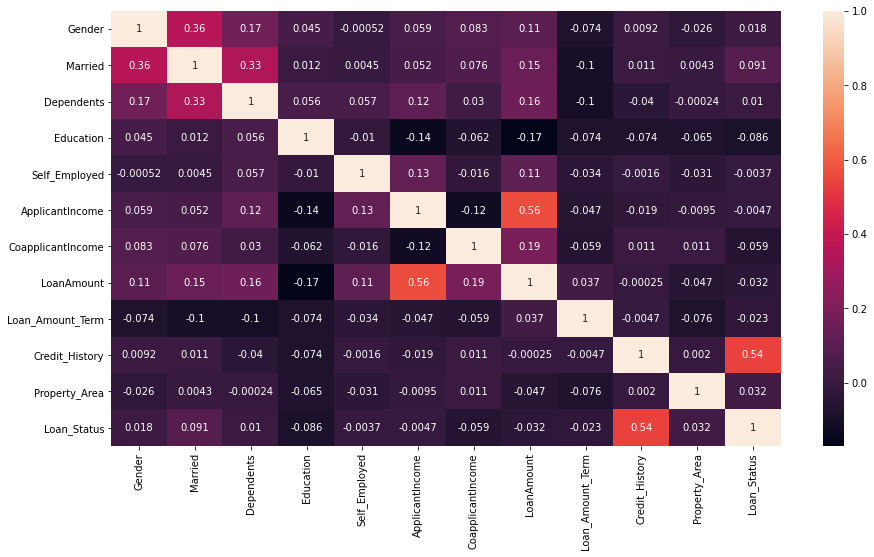

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

The column credit History is highly correlated to the target

# Check For MultiCollinearity- VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
df1=df.drop('Loan_Status', axis=1)

In [44]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [45]:
vif_fun()

,vif_factor,features
0,6.002051,Gender
1,3.654179,Married
2,1.792095,Dependents
3,1.306879,Education
4,1.176596,Self_Employed
5,2.885856,ApplicantIncome
6,1.482381,CoapplicantIncome
7,6.772218,LoanAmount
8,10.310045,Loan_Amount_Term
9,6.058999,Credit_History


There seems no multicollinearity between columns, so we shall proceed with skewness and outliers deduction and removal.

# Check For Skewness

In [46]:
df1.skew().sort_values(ascending=False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.745407
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

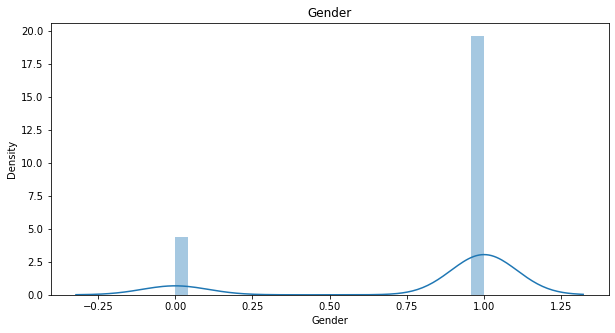

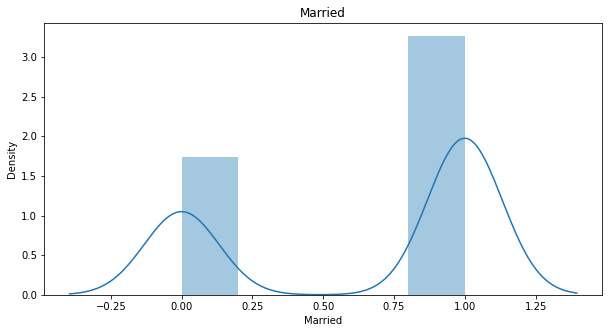

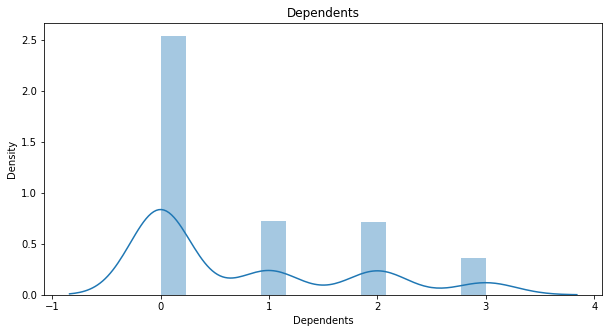

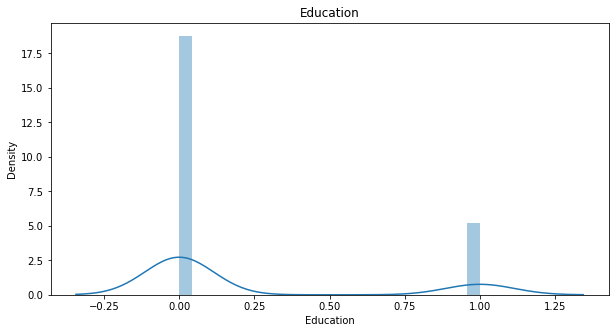

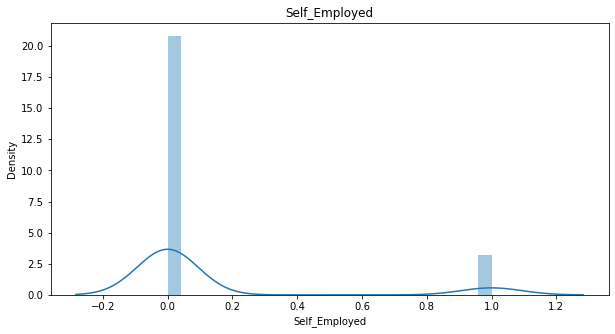

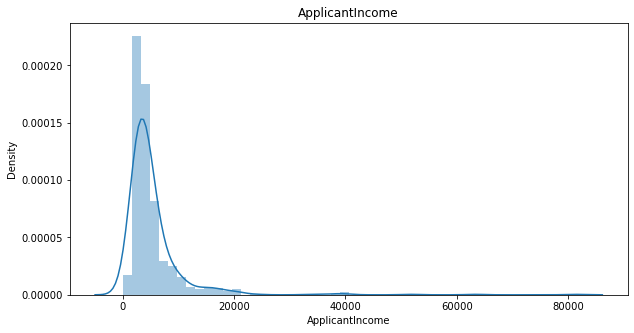

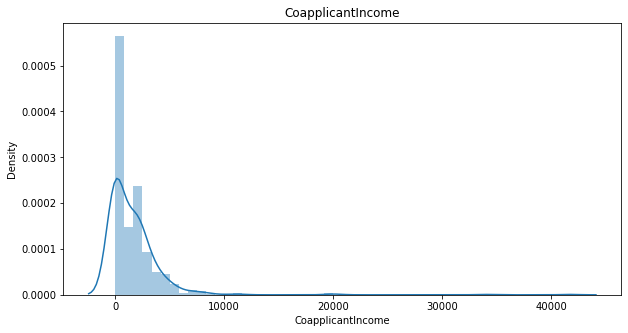

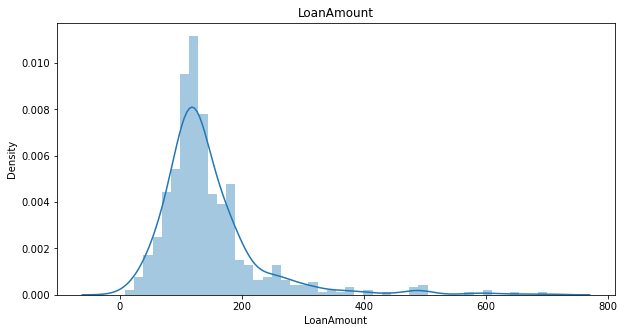

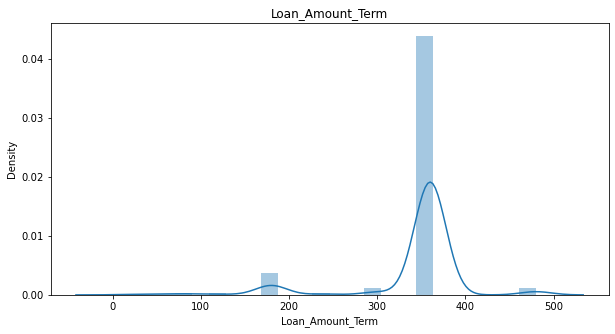

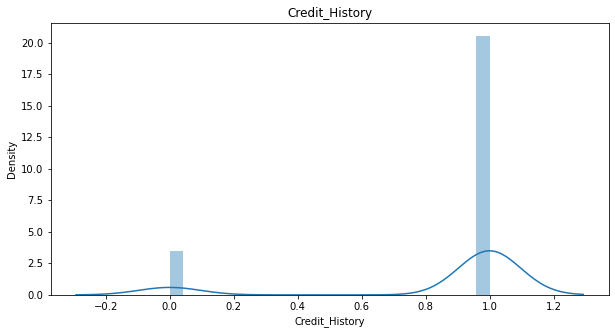

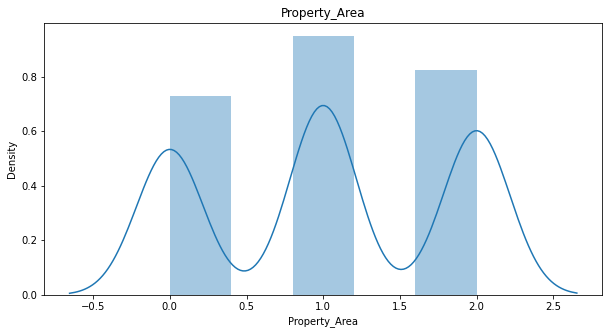

In [47]:
for i in df1.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

CoapplicantIncome, ApplicantIncome, LoanAmount has high skewness, which can be handled with Power Transformation

In [48]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_new= sc.fit_transform(df1_new)
df1_new

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.75540037e-01,  4.11732692e-01, -1.35000343e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         1.75540037e-01,  4.11732692e-01,  1.19356680e+00],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
         1.75540037e-01, -2.42876026e+00,  2.36103342e-03]])

In [50]:
df1=pd.DataFrame(df1_new, columns= df1.columns)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,-0.149985,0.175540,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.019602,0.175540,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.335521,0.175540,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.149985,0.175540,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.176671,0.175540,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.192913,0.175540,0.411733,-1.350003
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.295908,-2.312879,0.411733,-1.350003
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.384403,0.175540,0.411733,1.193567
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.755379,0.175540,0.411733,1.193567


In [51]:
df1.skew().sort_values(ascending=False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.392571
LoanAmount           0.018936
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

In [52]:
df1.skew()[np.abs(df1.skew())<0.25].all()

True

The skewness from each columns is reduced considerably.

In [54]:
df1['Loan_Status']= df['Loan_Status']

In [55]:
df1.shape

(614, 12)

# Check For Outliers

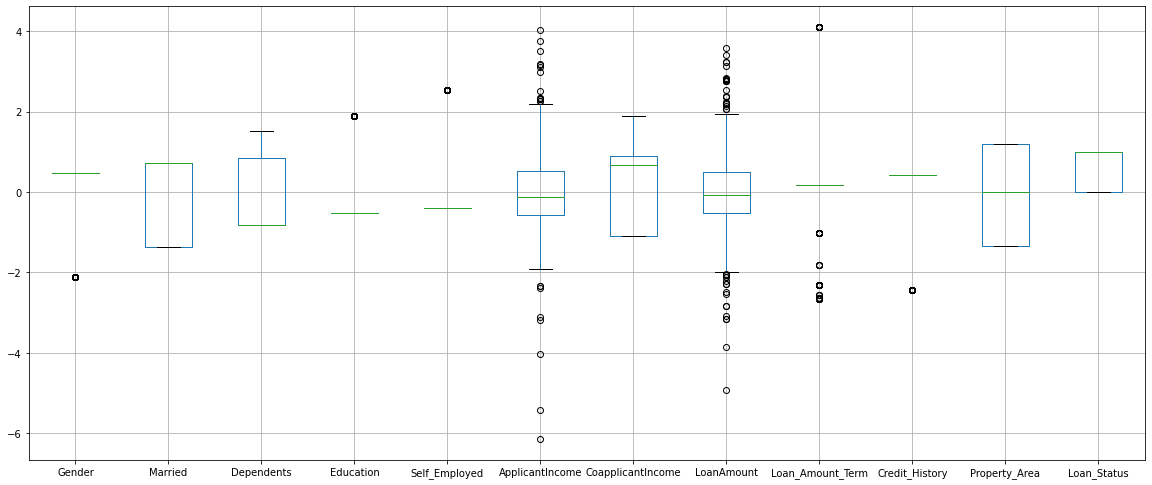

In [56]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Applicant income, Loan amount, Loan Amount Term columns has outliers . It can be handles with Zscore

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[4.72342640e-01, 1.37208932e+00, 8.27104306e-01, ...,
        4.11732692e-01, 1.19356680e+00, 6.74519313e-01],
       [4.72342640e-01, 7.28815525e-01, 8.54259122e-01, ...,
        4.11732692e-01, 1.35000343e+00, 1.48253724e+00],
       [4.72342640e-01, 7.28815525e-01, 8.27104306e-01, ...,
        4.11732692e-01, 1.19356680e+00, 6.74519313e-01],
       ...,
       [4.72342640e-01, 7.28815525e-01, 8.54259122e-01, ...,
        4.11732692e-01, 1.19356680e+00, 6.74519313e-01],
       [4.72342640e-01, 7.28815525e-01, 1.31670248e+00, ...,
        4.11732692e-01, 1.19356680e+00, 6.74519313e-01],
       [2.11710719e+00, 1.37208932e+00, 8.27104306e-01, ...,
        2.42876026e+00, 2.36103342e-03, 1.48253724e+00]])

In [58]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
       443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64), array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8,
       8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5], dtype=int64))


In [59]:
z[14][7]

3.8570123911529177

In [60]:
df1_new=df1[(z<3).all(axis=1)]

In [61]:
df1_new.shape

(582, 12)

In [62]:
df1.shape

(614, 12)

In [64]:
#Loss Percent
Loss= (614-582)/614*100
Loss

5.211726384364821

Only 5% of the data is lost. So we shall proceed to build the models.

# Spliting the data and Balancing 

In [66]:
x=df1_new.iloc[:,0:-1]
y=df1_new.iloc[:,-1]

In [67]:
y.value_counts()

1    404
0    178
Name: Loan_Status, dtype: int64

The data seems to be highly imbalanced, so to balance the dataset we shall use SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [71]:
y1.value_counts()

0    404
1    404
Name: Loan_Status, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Train The Model

In [72]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [76]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.9 on Random_state 81


# To Find the Best Cross Validation Score 

In [77]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [78]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [80]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.7091584158415841 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 3 the cv score is 0.706677681398871 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 4 the cv score is 0.7042079207920791 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 5 the cv score is 0.706632926922782 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 6 the cv score is 0.6992445181499908 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 7 the cv score is 0.7103448275862069 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


At cross fold 8 the cv score is 0.7029702970297029 and accuracy score for training is 0.7106598984771574 and the accuracy for testing is 0.8


A

At random State 81, cv=7 the models are to be tested for accuracy

# Check The Accuracy and Error

In [81]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=81)

# Logistic Regression

In [82]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Score: 0.7093908629441624
Acc_score: 0.9


In [84]:
cr_lg=cross_val_score(lg,x1,y1, cv=7)
print('Cross Validation Score of LogisticRegression is:', cr_lg.mean())

Cross Validation Score of LogisticRegression is: 0.7103448275862069


The difference between Accuracy score and cv score are more, so we shall try with other models

# GaussianNB

In [85]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Score:', gnb.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[ 7  0]
 [ 3 10]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.77      0.87        13

    accuracy                           0.85        20
   macro avg       0.85      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20

Score: 0.7068527918781726
Acc_score: 0.85


In [86]:
cr_gnb=cross_val_score(gnb,x1,y1, cv=7)
print('Cross Validation Score of GaussianNB is:', cr_gnb.mean())

Cross Validation Score of GaussianNB is: 0.7066823730991646


The difference between Accuracy score and cv score are less compared to Logistic Regression,so we shall try with other models

# DecisionTreeClassifier

In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Score:', dtc.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Score: 1.0
Acc_score: 0.9


In [89]:
cr_dtc=cross_val_score(dtc,x1,y1, cv=7)
print('Cross Validation Score of DecisionTreeClassifier is:', cr_dtc.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.7811629899336046


The difference between Accuracy score and cv score are less compared to GaussianNB,so we shall try with other models

# RandomForestClassifier

In [90]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[8 3]
 [2 7]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.70      0.78      0.74         9

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.76      0.75      0.75        20

Acc_score: 0.75


In [91]:
cr_rf=cross_val_score(rf,x1,y1, cv=7)
print('Cross Validation Score of RandomForestClassifier is:', cr_rf.mean())

Cross Validation Score of RandomForestClassifier is: 0.8257228528592846


The difference between Accuracy score and cv score are less compared to other models.

# SVC

In [92]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[9 1]
 [1 9]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

Acc_score: 0.9


In [93]:
cr_svc=cross_val_score(svc,x1,y1, cv=7)
print('Cross Validation Score of SVC is:', cr_svc.mean())

Cross Validation Score of SVC is: 0.7191261512101093


RandomForestClassifier has more accuracy than any other models. The Cv score is also near to the accuracy score, So we shall improve the accuracy with Hyper Parameter Tuning

# Hyper Parameter Tuning With GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
RandomForestClassifier()

RandomForestClassifier()

In [96]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6],
            'min_samples_split':[2,3,4]}

In [97]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=3, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [98]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_split=3)

In [99]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.85

In [100]:
rf=RandomForestClassifier(criterion='entropy',
                          max_depth=6,
                          max_features='log2',
                          min_samples_leaf= 1,
                          min_samples_split=3)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[9 2]
 [1 8]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20

Acc_score: 0.85


The accuracyis nearly 85% after tuning the parameters. So the model is performing good with the dataset without overfitting.

# AUC-ROC Curve

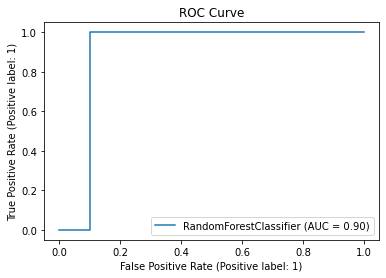

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

AUC-ROC Curve shows that the model perfoms 90% well.

Area Under Curve is 90% fit. So the model has good performance

# Save The Model

In [109]:
import pickle
filename= 'Loan.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [110]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con[0:20]

,original,Predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [ ]:
The predicted results are nearly equal to the actual results. The model gave good prediction.